<a href="https://colab.research.google.com/github/Sirinegaida/SVM_LINEAR-/blob/main/SVM_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM from Scratch

## Linear SVM
### y = mx + b

### y = x + z + b + q

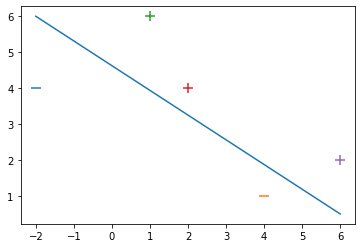

In [ ]:
#هذه المكتبه تساعدنا على القيام بعمليات حسابيه على المصفوفات
import numpy as np
#هذه المكتبه خاصة بالرسم
from matplotlib import pyplot as plt
%matplotlib inline

#اولاً نقوم بإنشاء مصفوفة نبماي  لنشكل البيانات dummy data creation

#المدخلات تكون على الصيغة التاليه - [X قيمة, Y قيمة, Bias term]
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

# التسميات حيث سنقوم باعتبار العينتين الاولى سالب 1 و الثالث الاخرى على انهن موجب 1
y = np.array([-1,-1,1,1,1])

#لنرسم العينات على شكل ثنائي الابعاد هنا
for d, sample in enumerate(X):
    # رسم العينات السالبه
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # رسم العيانات الموجبه
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# رسم خط إفتراضي فاصل بين الكلاسين
# نفرض ذلك من خلال رسم خط بين نقطتين قمنا بتحديدهم كما يلي
plt.plot([-2,6],[6,0.5])

# حساب الخطأباستخدام معادلة Hinge Loss
## نستخدم هذه المعادلة لحساب الخطأحيث غالباً ما تستخدم في تصنيف البيانات و maximum margin 

## c(x,y,f(x)) = (1 - y*f(x))+

![title](img/hinge.png)

# Objective Function

![title](img/act.png)

## What is regularizer ?

### هو الجزء المسؤل عن الضبط بين قيمة الخطأ تكبير الهامش margin maximization

# كيف يحدث التعليم رياضياً؟

# ![title](img/opt.png)

# الوزن Weight
# What is the weight ?

## الوزن هو عباره عن متجه و يرسم لنا موقع خط القرار او الخط الفاصل

## شرط التصنيف الخطأ

![title](img/m.png)

### في حالة التصنيف الخطأ نقوم بتحديث قيمة الوزن في معادلة الخسارة و المنظم باستخدام المعادلة التاليه 

![title](img/w.png)

#### n = learning rate معدل التعليم
#### λ = regularizer المنظم

#### مهمة معدل التعليم انه يعمل كمقدار المسافة التي نقطعها في البحث في داخل منحنى الخطأ

#### معدل تعليم عالي: الخوارزمية قد تتجاوز اقل نقطة خطأ و يتم الامر بسرعه
#### معدل تعليم منخفض: قد ياخذ البحث مليون سنه ضوئيه لتصل و ربما لتصل 

### المنظم يتحكم بالمعادلة بين تحقيق قيمة خطأمنخفضه في التدريب و في الفحص
#### قيمة منظم مرتفع: خطأ كبير في الفحص 
#### قيمة منظم منخفضه: خطأ كبير في التدريب
### Regularizer value = 1/ epoch

### تعديل الوزن في حالة التصنيف الصحيح يكون في معادلة المنظممن المعادلة التاليه

![title](img/wy.png)

TypeError: ignored

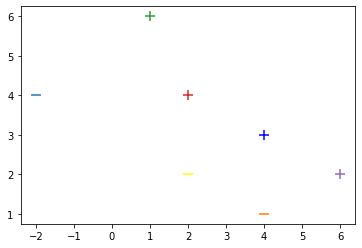

In [ ]:
#lets perform stochastic gradient descent to learn the seperating hyperplane between both classes

def svm_sgd_plot(X, Y):

    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 100000
    errors = []


    for epoch in range(1,epochs):
        error = 0
        for i, x in enumerate(X):
            if (Y[i]*np.dot(X[i], w)) < 1:
                w = w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
                error = 1
            else:
                w = w + eta * (-2  *(1/epoch)* w)
        errors.append(error)

    plt.plot(errors, '|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()
    
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by svm_sgd()
x2=[w[0],-w[1],w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')

<ipython-input-14-dbab08d5ef45>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_yticklabels([])


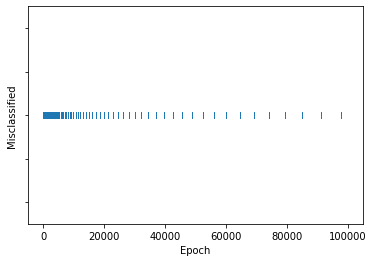

In [ ]:
w = svm_sgd_plot(X,y)
#they decrease over time! Our SVM is learning the optimal hyperplane